<a href="https://colab.research.google.com/github/zmirzaei/tensorflow/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [66]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot','hel']

In [63]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

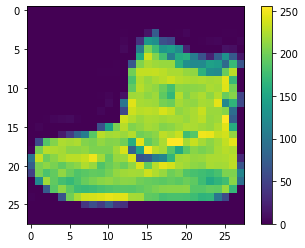

In [67]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
train_images = train_images / 255.0

test_images = test_images / 255.0

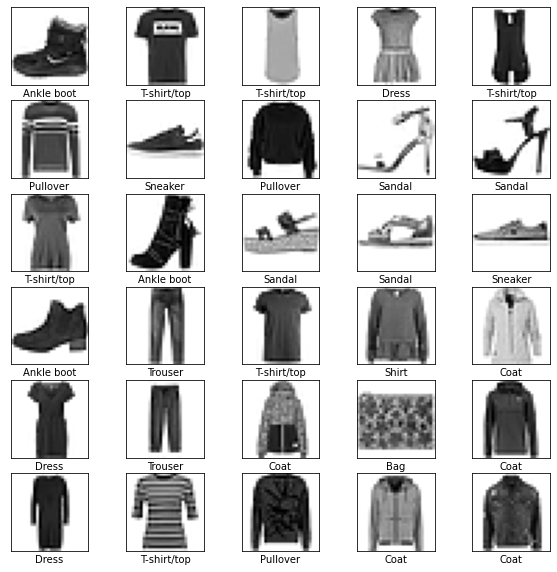

In [69]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

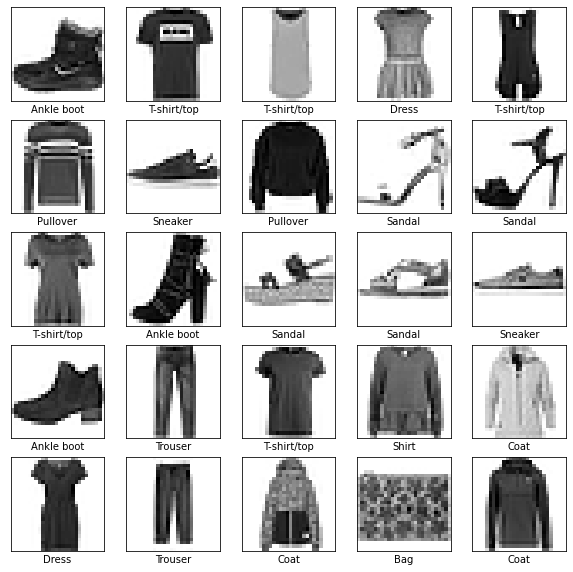

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11)
])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2560 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [73]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3541 - accuracy: 0.8756

Test accuracy: 0.8755999803543091


In [74]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [75]:
predictions = probability_model.predict(test_images)

In [115]:
predictions[0]

array([3.9231434e-08, 2.6227409e-11, 3.0416018e-08, 8.0440724e-12,
       2.4480440e-09, 2.6046540e-04, 8.7491679e-07, 1.4415748e-02,
       5.8953155e-08, 9.8532271e-01, 7.4379105e-18], dtype=float32)

In [77]:
np.argmax(predictions[12])

5

In [78]:
test_labels[12]

7

In [95]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) #dont undrestand this line

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(11))
  plt.yticks([])
  thisplot = plt.bar(range(11), predictions_array, color="#C9B615") 
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

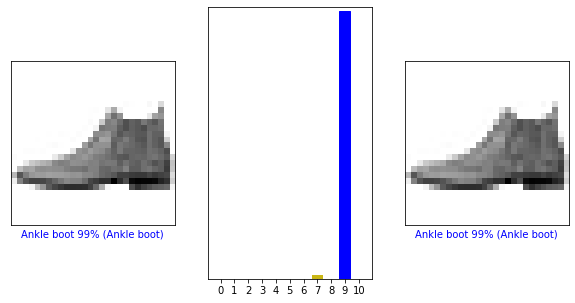

In [96]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,3,2)
plot_value_array(i, predictions[i],  test_labels)
plt.subplot(1,3,3)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

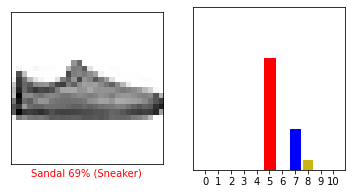

In [98]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

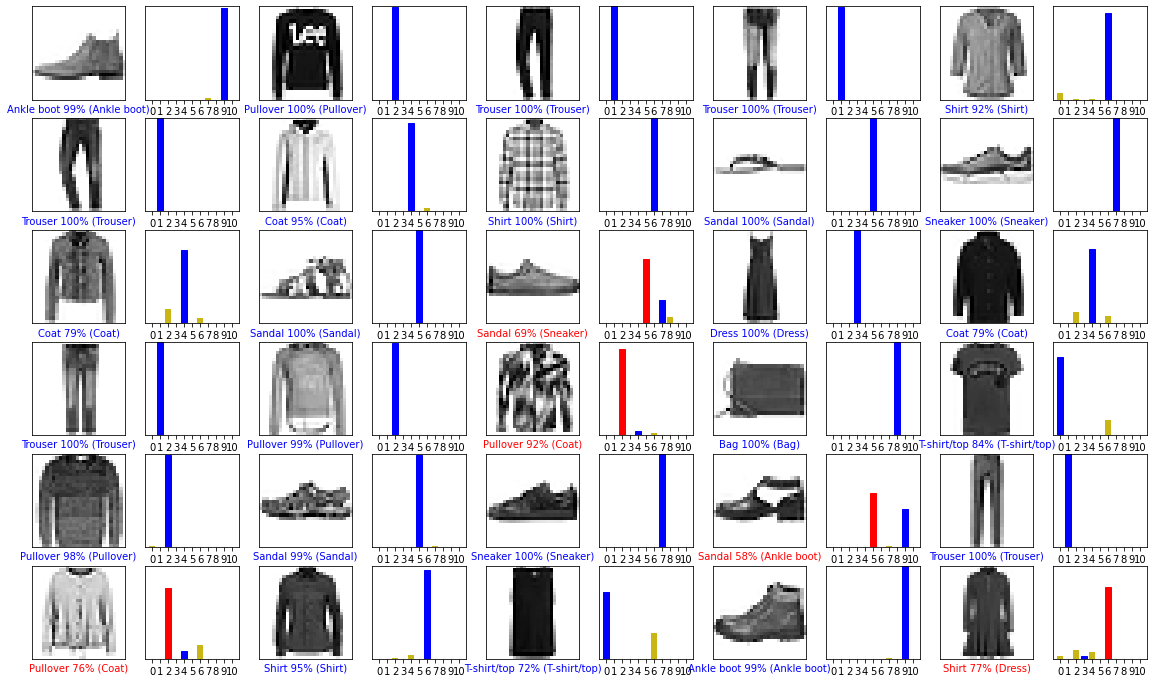

In [108]:
plt.figure(figsize=(20,12))
for i in range(30):
  plt.subplot(6,10,i*2+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(6,10,i*2+2)
  plot_value_array(i, predictions[i],  test_labels)
#plt.tight_layout()
plt.show()


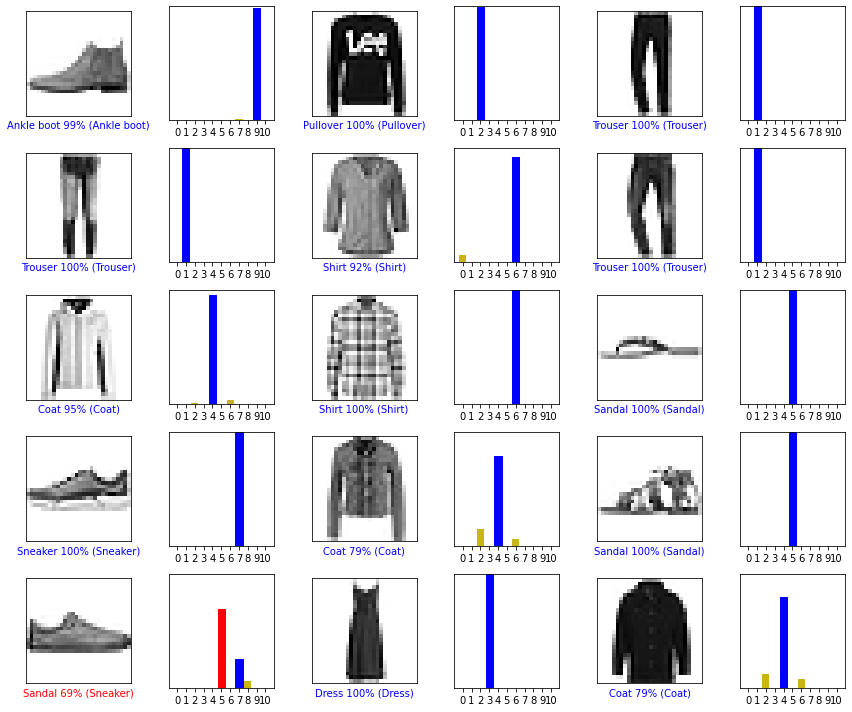

In [97]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [109]:
img = test_images[1]

print(img.shape)

(28, 28)


In [110]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [112]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.5550466e-05 1.1696803e-15 9.9836844e-01 1.2249054e-11 9.8668947e-04
  9.6147604e-12 6.1941141e-04 5.2153730e-16 1.6215589e-09 2.0471264e-17
  6.3498482e-29]]


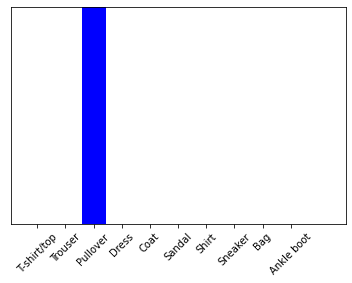

In [113]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [114]:
np.argmax(predictions_single[0])

2